# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [31]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O /HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

--2024-04-13 02:13:43--  https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb572016d78ff977387df8a1e07.dl.dropboxusercontent.com/cd/0/inline/CQ6oPYTUU-udhqeVwf-bzjfvgHcdPxR_maTRNledn_sLteJ_k2-nrg9VRjQ1Epob0t43S1TxSEy2SCl3eutNZoYPDT2_QwfgXOhMHG1RKl8lojDrqYR2RkTtIiLsbMa1RqmDTdCU0XKopr3djuAhsq3O/file# [following]
--2024-04-13 02:13:43--  https://ucb572016d78ff977387df8a1e07.dl.dropboxusercontent.com/cd/0/inline/CQ6oPYTUU-udhqeVwf-bzjfvgHcdPxR_maTRNledn_sLteJ_k2-nrg9VRjQ1Epob0t43S1TxSEy2SCl3eutNZoYPDT2_QwfgXOhMHG1RKl8lojDrqYR2RkTtIiLsbMa1RqmDTdCU0XKopr3djuAhsq3O/file
Resolving ucb572016d78ff977387df8a1e07.dl.dropboxusercontent.com (ucb572016d78ff977387df8a1e07.dl.dropboxusercontent.com)... 162.125.5.15, 2620:1

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [32]:
def load_and_impute_data(file_path):
    data_frame = pd.read_csv(file_path)
    print(data_frame.head())
    print("\nMissing Values Before Imputation:")
    print(data_frame.isnull().sum())

    data_frame.fillna(data_frame.mean(), inplace=True)

    print("\nMissing Values After Imputation:")
    print(data_frame.isnull().sum())
    return data_frame

file_path = '/HousingData.csv'
df = load_and_impute_data(file_path)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  

Missing Values Before Imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Missing Values After Imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO

Get a brief description of the dataset

In [33]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.92

Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [34]:
X = df.drop(columns=['MEDV']).values
print(type(X))
print(X[:5])

<class 'numpy.ndarray'>
[[6.32000000e-03 1.80000000e+01 2.31000000e+00 0.00000000e+00
  5.38000000e-01 6.57500000e+00 6.52000000e+01 4.09000000e+00
  2.96000000e+02 1.53000000e+01 3.96900000e+02 4.98000000e+00]
 [2.73100000e-02 0.00000000e+00 7.07000000e+00 0.00000000e+00
  4.69000000e-01 6.42100000e+00 7.89000000e+01 4.96710000e+00
  2.42000000e+02 1.78000000e+01 3.96900000e+02 9.14000000e+00]
 [2.72900000e-02 0.00000000e+00 7.07000000e+00 0.00000000e+00
  4.69000000e-01 7.18500000e+00 6.11000000e+01 4.96710000e+00
  2.42000000e+02 1.78000000e+01 3.92830000e+02 4.03000000e+00]
 [3.23700000e-02 0.00000000e+00 2.18000000e+00 0.00000000e+00
  4.58000000e-01 6.99800000e+00 4.58000000e+01 6.06220000e+00
  2.22000000e+02 1.87000000e+01 3.94630000e+02 2.94000000e+00]
 [6.90500000e-02 0.00000000e+00 2.18000000e+00 0.00000000e+00
  4.58000000e-01 7.14700000e+00 5.42000000e+01 6.06220000e+00
  2.22000000e+02 1.87000000e+01 3.96900000e+02 1.27154321e+01]]


look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

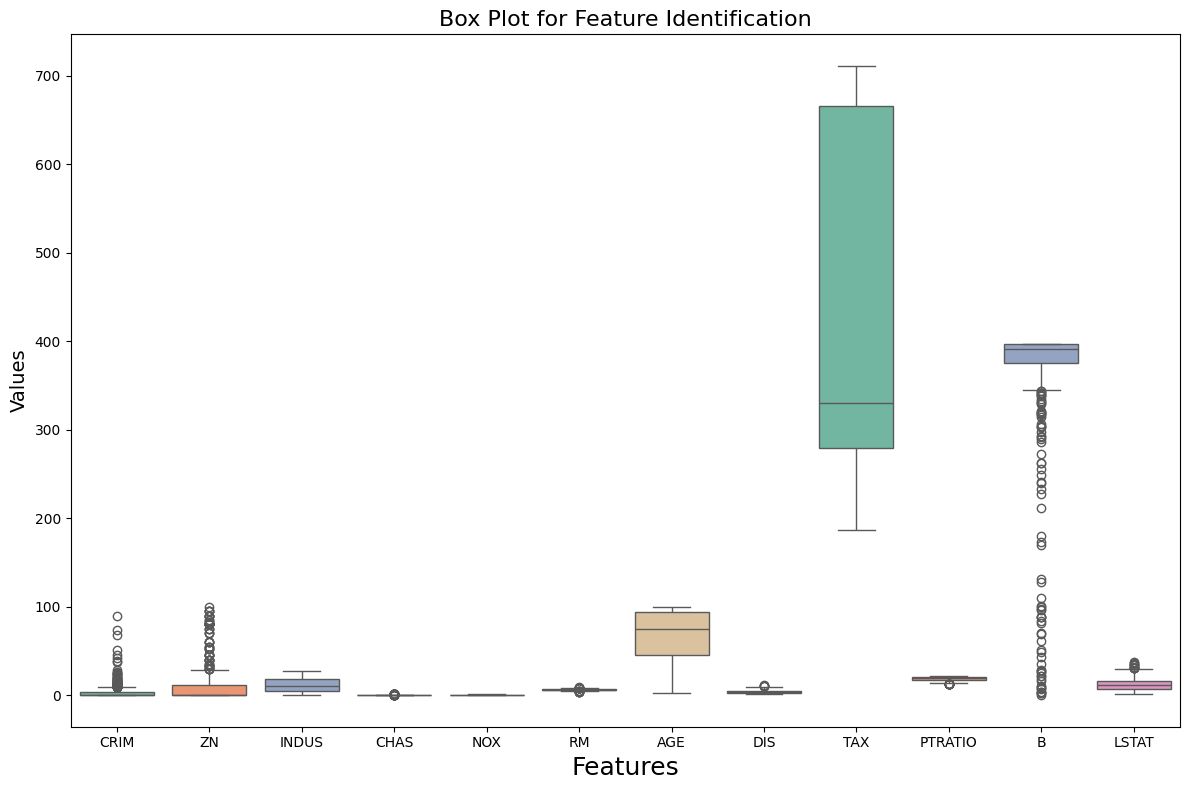

In [35]:
def plot_feature_boxplot(data_frame, exclude_column=None):
    if exclude_column:
        data_frame = data_frame.drop(columns=[exclude_column])

    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data_frame, palette='Set2')
    plt.title('Box Plot for Feature Identification', fontsize=16)
    plt.xlabel('Features', fontsize=18)
    plt.ylabel('Values', fontsize=14)
    plt.tight_layout()
    plt.show()

plot_feature_boxplot(df, exclude_column='MEDV')

In [36]:
def detect_and_scale_outliers(data_frame):
    q1 = data_frame.quantile(0.25)
    q3 = data_frame.quantile(0.75)
    iqr = q3 - q1

    outliers = (data_frame < (q1 - 1.5 * iqr)) | (data_frame > (q3 + 1.5 * iqr))
    print(outliers.any())
    print()

    if outliers.any().any():
        print("Outliers are here! Applying StandardScaler!.")
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data_frame)
        return scaled_data
    else:
        print("No outliers.")
        return data_frame

scaled_df = detect_and_scale_outliers(df)

CRIM        True
ZN          True
INDUS      False
CHAS        True
NOX        False
RM          True
AGE        False
DIS         True
TAX        False
PTRATIO     True
B           True
LSTAT       True
MEDV        True
dtype: bool

Outliers are here! Applying StandardScaler!.


add polynomial features to increase model complexity!



In [37]:
poly_X = PolynomialFeatures(degree=2)
X = poly_X.fit_transform(X)

Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [38]:
# TODO: extract the MEDV
y = df['MEDV'].values
print(type(y))
print(y[:5])

<class 'numpy.ndarray'>
[24.  21.6 34.7 33.4 36.2]


Split the dataset into two parts such that the training set contains 80% of the samples.

In [39]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Training


Fit a linear regressor to the data. (Use sklearn)


In [40]:
# TODO: Use sklearn
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

Coefficients of the variables in the sklearn: [-0.0, 6.713, 0.719, -1.571, 84.609, 80.637, 20.359, 0.572, -9.095, -0.074, 3.555, 0.092, 0.098, 0.003, -0.023, 0.055, 1.131, -3.371, 0.075, -0.002, -0.105, -0.002, -0.229, -0.0, 0.004, -0.0, 0.001, 0.015, -0.559, -0.002, 0.0, -0.004, 0.001, -0.009, -0.001, -0.005, 0.027, 0.494, 0.678, -0.004, 0.011, 0.224, -0.001, -0.034, 0.001, -0.033, 24.302, -70.726, -6.711, -0.002, -0.67, 0.03, -1.443, -0.028, -0.256, -31.055, -7.322, 0.012, 10.569, 0.093, -5.124, -0.018, 1.378, 0.487, -0.052, -0.292, -0.01, -0.393, 0.001, -0.124, 0.0, 0.011, -0.0, -0.005, -0.001, -0.009, 0.491, -0.008, -0.03, 0.003, 0.002, 0.0, 0.009, -0.0, -0.001, -0.034, 0.0, 0.039, -0.0, -0.0, 0.019]


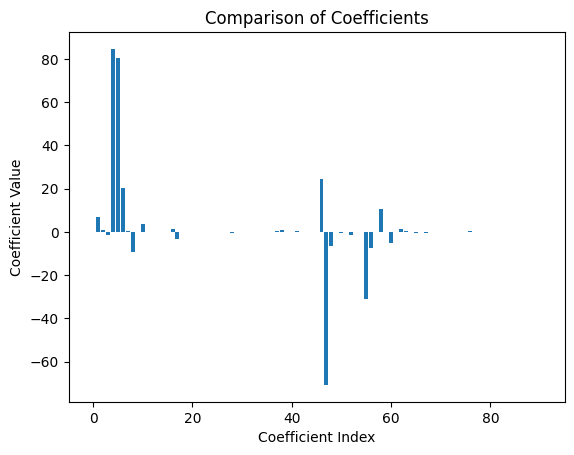

In [41]:
def display_coefficients(coefficients):
    rounded_coeffs = list(map(lambda x: round(x, 3), coefficients))
    print("Coefficients of the variables in the sklearn:", rounded_coeffs)

    plt.bar(range(len(coefficients)), coefficients, align='center')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')
    plt.title('Comparison of Coefficients')
    plt.show()

coefficients = linear_regressor.coef_
display_coefficients(coefficients)

if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [42]:
def evaluate_model_performance(model, X_data, y_data):
    y_pred = model.predict(X_data)

    r2 = r2_score(y_data, y_pred)
    mse = mean_squared_error(y_data, y_pred)

    print("R² score on the dataset:", r2)
    print("Mean Squared Error on the dataset:", mse)
    return r2, mse

linear_r2_train, linear_mse_train = evaluate_model_performance(linear_regressor, X_train, y_train)

R² score on the dataset: 0.9139469574279981
Mean Squared Error on the dataset: 6.996723926310168


Predict the value of "y" for each "x" belonging to the "testing" set

In [43]:
linear_r2_test, linear_mse_test = evaluate_model_performance(linear_regressor, X_test, y_test)

print("R² score on the test dataset:", linear_r2_test)
print("Mean Squared Error on the test dataset:", linear_mse_test)

R² score on the dataset: 0.8015930088071586
Mean Squared Error on the dataset: 19.164990394556195
R² score on the test dataset: 0.8015930088071586
Mean Squared Error on the test dataset: 19.164990394556195


# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [44]:
# TODO: Use Lasso from sklearn library
lasso_regressor = Lasso()
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.539e+03, tolerance: 3.285e+00
  model = cd_fast.enet_coordinate_descent(


Lasso()

Get the coefficients of the variables and visualize it.

Coefficients of the variables in Lasso regression: [0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.015, -0.0, -0.0, -0.0, 0.001, -0.006, 0.013, 0.0, 0.0, 0.0, -0.0, 0.0, -0.001, 0.009, 0.0, -0.006, -0.0, 0.003, -0.0, 0.0, 0.047, 0.0, 0.004, 0.0, 0.0, -0.001, -0.007, 0.005, 0.0, 0.0, 0.0, 0.009, 0.0, -0.0, -0.035, 0.0, -0.025, 0.0, -0.0, -0.0, 0.0, -0.0, 0.01, 0.0, -0.003, 0.0, 0.0, 0.0, 0.0, -0.0, -0.022, -0.0, -0.003, 0.0, 0.18, 0.018, 0.0, -0.014, 0.0, 0.018, -0.007, 0.001, 0.009, -0.0, -0.001, -0.001, -0.006, 0.105, -0.004, 0.011, -0.004, -0.004, 0.0, 0.005, -0.0, -0.001, -0.041, -0.002, -0.001, -0.0, 0.0, 0.031]


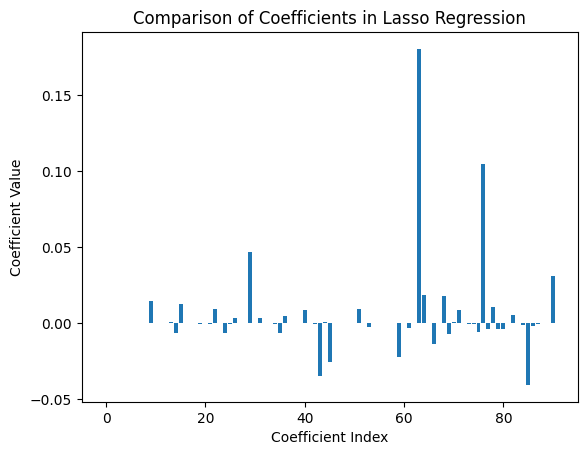

In [45]:
def display_regression_coefficients(coefficients, title='Comparison of Coefficients'):
    rounded_coeffs = list(map(lambda x: round(x, 3), coefficients))
    print("Coefficients of the variables in Lasso regression:", rounded_coeffs)

    plt.bar(np.arange(len(coefficients)), coefficients, align='center')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')
    plt.title(title)
    plt.show()

lasso_coefficients = lasso_regressor.coef_
display_regression_coefficients(lasso_coefficients, title='Comparison of Coefficients in Lasso Regression')

1- What observations can you make about the weight distribution when applying L1 regularization?


When we use L1 regularization (also known as Lasso), we often see that some of the coefficients for the features become zero. This suggests that L1 regularization encourages the model to be sparse by reducing some coefficients to zero, ultimately selecting only the most important features while ignoring less important ones. This can be quite useful in situations where there are many redundant or irrelevant features, as it makes the model simpler and easier to understand. Furthermore, the non-zero coefficients tend to be smaller than those obtained from models without regularization, which can help prevent overfitting and improve the model's overall performance. In summary, L1 regularization is a powerful tool for selecting features and creating simpler, more interpretable models.

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+03, tolerance: 3.285e+00
  model = cd_fast.enet_coordinate_descent(


For alpha: 0.1, the Zero Coefficients Count: 21, Non-zero Coefficients Count: 70


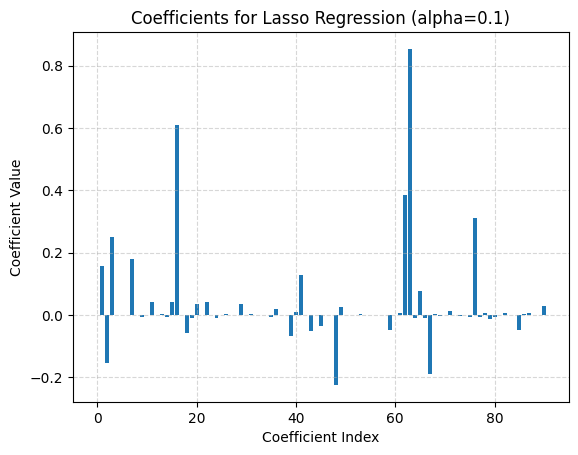

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.221e+03, tolerance: 3.285e+00
  model = cd_fast.enet_coordinate_descent(


For alpha: 0.2, the Zero Coefficients Count: 29, Non-zero Coefficients Count: 62


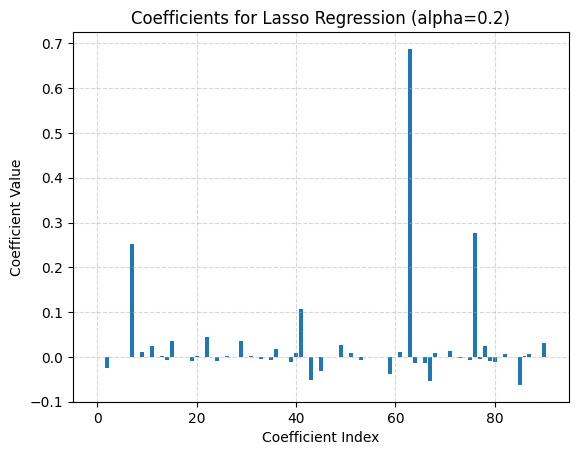

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.377e+03, tolerance: 3.285e+00
  model = cd_fast.enet_coordinate_descent(


For alpha: 0.5, the Zero Coefficients Count: 36, Non-zero Coefficients Count: 55


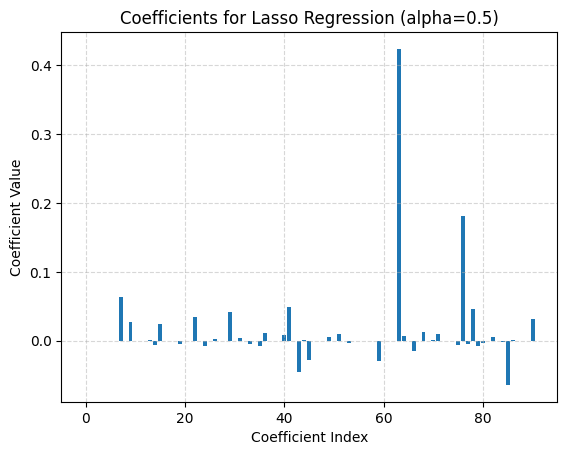

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.539e+03, tolerance: 3.285e+00
  model = cd_fast.enet_coordinate_descent(


For alpha: 1.0, the Zero Coefficients Count: 38, Non-zero Coefficients Count: 53


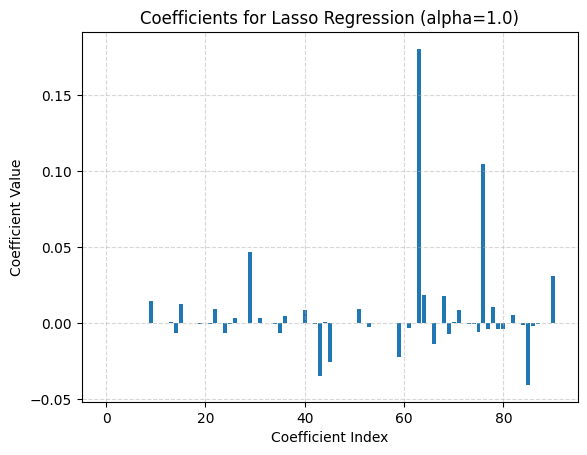

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.670e+03, tolerance: 3.285e+00
  model = cd_fast.enet_coordinate_descent(


For alpha: 2.0, the Zero Coefficients Count: 46, Non-zero Coefficients Count: 45


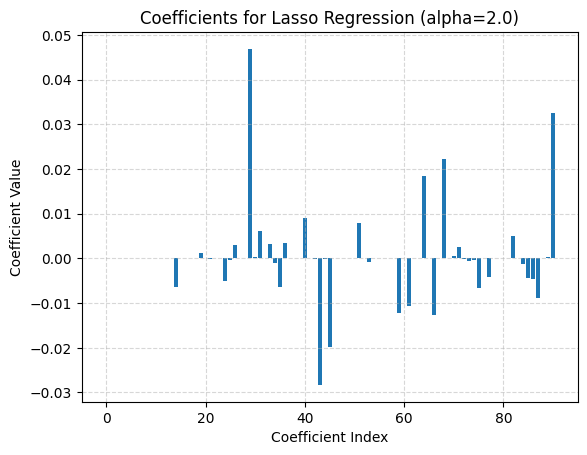

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.874e+03, tolerance: 3.285e+00
  model = cd_fast.enet_coordinate_descent(


For alpha: 5.0, the Zero Coefficients Count: 58, Non-zero Coefficients Count: 33


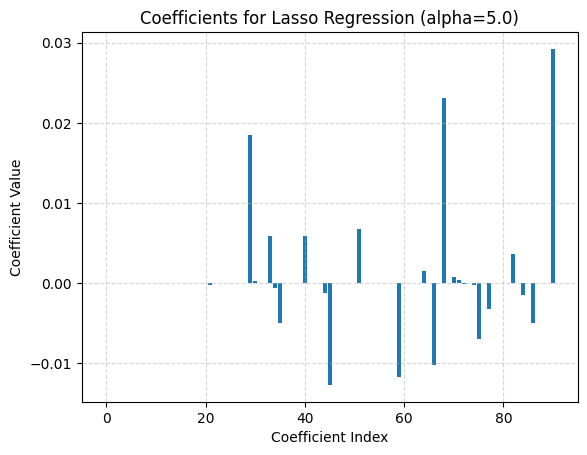

In [46]:
def train_lasso(X, y, alpha):
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X, y)
    coefficients = lasso_regressor.coef_
    zero_count = np.count_nonzero(coefficients == 0)
    return coefficients, zero_count

def plot_coefficients(coefficients, alpha):
    plt.bar(np.arange(len(coefficients)), coefficients, align='center')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')
    plt.title(f'Coefficients for Lasso Regression (alpha={alpha})')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

alphas = np.array([0.1, 0.2, 0.5, 1, 2, 5])
for alpha in alphas:
    coefficients, zero_count = train_lasso(X_train, y_train, alpha)
    non_zero_count = len(coefficients) - zero_count
    print(f"For alpha: {alpha}, the Zero Coefficients Count: {zero_count}, Non-zero Coefficients Count: {non_zero_count}")

    plot_coefficients(coefficients, alpha)

Different values of the regularization parameter (alpha) have an impact on the sparsity of the model coefficients. The effect of alpha on the sparsity of the model coefficients is as follows:

1. High Alpha: As the value of alpha increases, more coefficients are penalized and forced to zero. This leads to a higher number of zero coefficients, which means that the model becomes sparser as it discards more features.

2. Low Alpha: When alpha has a low value, fewer coefficients are forced to become zero. This results in a higher number of non-zero coefficients, which means that the model tends to retain more features. Consequently, the model becomes less sparse.

Therefore, increasing the value of alpha tends to increase the sparsity of the model coefficients, while decreasing alpha leads to less sparsity and more non-zero coefficients.

Get the score value on train dataset

In [55]:
lasso_regressor = Lasso(0.5)
lasso_regressor.fit(X_train, y_train)

lasso_r2_train, lasso_mse_train = evaluate_model_performance(lasso_regressor, X_train, y_train)

print("R² score on the training dataset:", lasso_r2_train)
print("Mean Squared Error on the training dataset:", lasso_mse_train)

R² score on the dataset: 0.8704894224135504
Mean Squared Error on the dataset: 10.530130368733591
R² score on the training dataset: 0.8704894224135504
Mean Squared Error on the training dataset: 10.530130368733591


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.377e+03, tolerance: 3.285e+00
  model = cd_fast.enet_coordinate_descent(


Predict the value of "y" for each "x" belonging to the "testing" set

In [56]:
lasso_r2_test, lasso_mse_test = evaluate_model_performance(lasso_regressor, X_test, y_test)

print("R² score on the test dataset:", lasso_r2_test)
print("Mean Squared Error on the test dataset:", lasso_mse_test)

R² score on the dataset: 0.8599242345839618
Mean Squared Error on the dataset: 13.53052471875466
R² score on the test dataset: 0.8599242345839618
Mean Squared Error on the test dataset: 13.53052471875466


It is true that regressions with lower alpha tend to have a higher evaluated score and, therefore, are considered stronger. However, when selecting the most appropriate alpha argument for the regressor, other factors such as simplicity, sparsity of coefficients, and overfitting should also be taken into consideration.

# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [49]:
# TODO: Use Ridge from sklearn library
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, y_train)

Ridge()

Get the coefficients of the variables and visualize it.

Coefficients of the variables in Ridge regression: [0.0, 3.983, 0.238, -0.528, 1.819, 0.067, 4.77, 0.747, -2.055, -0.032, -1.567, 0.071, -0.846, 0.003, -0.02, 0.057, 1.4, -2.439, 0.089, -0.002, -0.03, -0.002, -0.122, -0.0, 0.005, -0.0, 0.002, 0.092, -0.179, 0.019, -0.0, -0.004, 0.0, -0.006, -0.001, -0.004, 0.027, 0.655, 0.632, -0.034, 0.009, 0.178, -0.001, -0.052, 0.001, -0.037, 2.862, -0.647, -4.961, 0.093, 0.87, -0.033, 1.434, 0.01, -0.622, 0.007, 1.392, -0.388, 2.268, 0.003, -1.284, -0.011, 1.949, 0.804, -0.043, -0.141, -0.013, -0.105, 0.003, -0.085, 0.001, 0.009, -0.0, -0.01, -0.001, -0.009, 0.343, -0.009, -0.017, -0.004, 0.019, 0.0, 0.009, -0.0, -0.002, -0.015, 0.002, 0.055, -0.0, -0.0, 0.021]


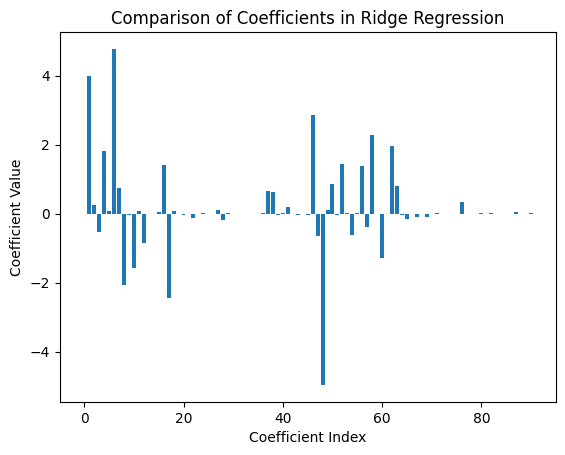

In [50]:
def display_regression_coefficients(coefficients, title='Comparison of Coefficients'):
    rounded_coeffs = list(map(lambda x: round(x, 3), coefficients))
    print("Coefficients of the variables in Ridge regression:", rounded_coeffs)

    plt.bar(np.arange(len(coefficients)), coefficients, align='center')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')
    plt.title(title)
    plt.show()

ridge_coefficients = ridge_regressor.coef_
display_regression_coefficients(ridge_coefficients, title='Comparison of Coefficients in Ridge Regression')

1. Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

Certainly, I can provide you with a summary of the main differences between L1 (Lasso) and L2 (Ridge) regularization techniques.

Firstly, in terms of sparsity, L1 regularization tends to produce sparse solutions by setting some coefficients to precisely zero, which is not the case with L2 regularization. In contrast, L2 regularization shrinks coefficients towards zero but rarely sets them exactly at zero, resulting in non-sparse solutions.

Secondly, regarding feature selection, L1 regularization inherently performs feature selection by eliminating some coefficients, making it useful for dealing with high-dimensional data. In contrast, L2 regularization does not perform feature selection but rather shrinks all coefficients uniformly.

In summary, L1 regularization tends to favor sparsity and feature selection, while L2 regularization encourages smaller coefficients without necessarily eliminating any features.


 2. How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

Alpha: 0.01, Significantly Affected Coefficients Count: 12


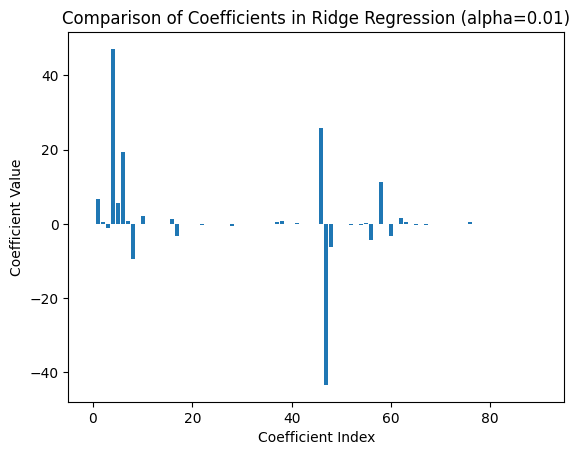

Alpha: 0.5, Significantly Affected Coefficients Count: 19


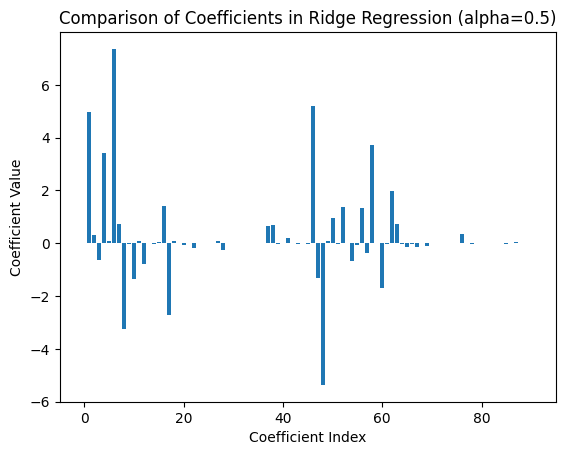

Alpha: 1.0, Significantly Affected Coefficients Count: 19


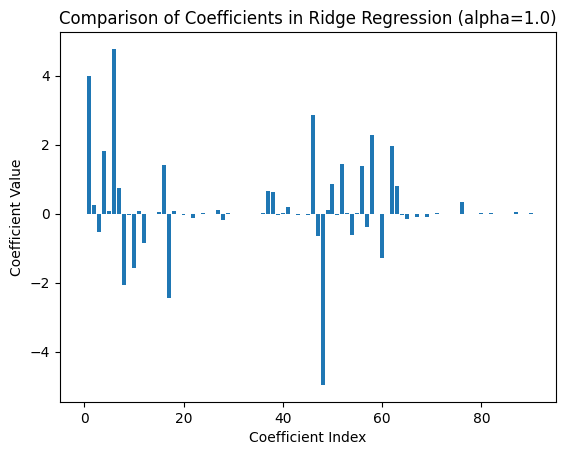

Alpha: 2.0, Significantly Affected Coefficients Count: 19


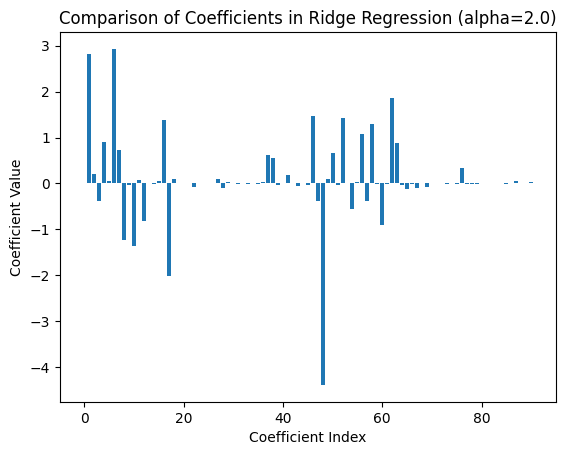

Alpha: 5.0, Significantly Affected Coefficients Count: 20


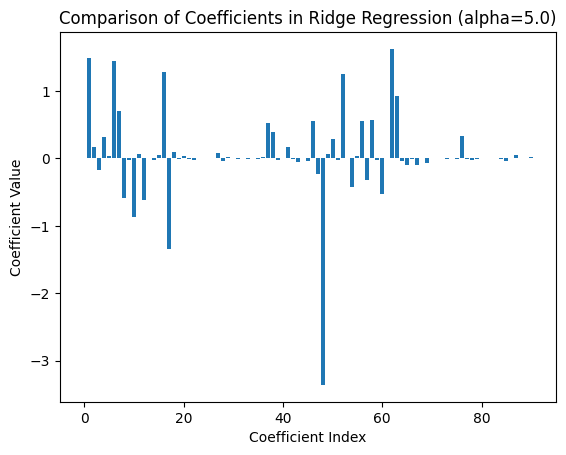

Alpha: 10.0, Significantly Affected Coefficients Count: 20


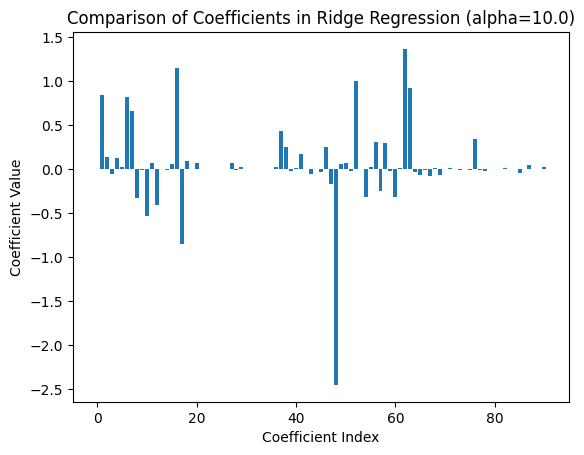

Alpha: 25.0, Significantly Affected Coefficients Count: 20


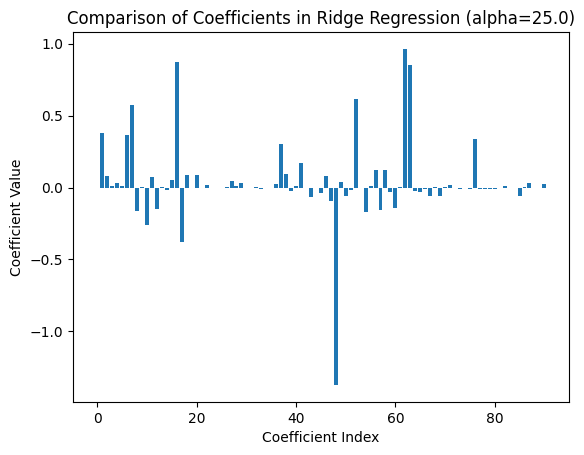

Alpha: 50.0, Significantly Affected Coefficients Count: 22


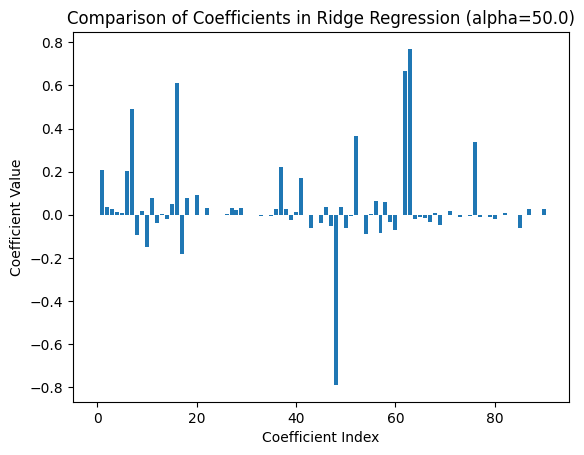

In [51]:
def compare_coefficients(alpha, X_train, y_train, baseline_coefs, threshold=0.5):
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_train, y_train)
    ridge_coefficients = ridge_regressor.coef_

    coefficients_difference = ridge_coefficients - baseline_coefs
    significantly_affected_indices = np.where(abs(coefficients_difference) > threshold)[0]
    return ridge_coefficients, significantly_affected_indices

def plot_coefficients(coefficients, alpha):
    plt.bar(np.arange(len(coefficients)), coefficients, align='center')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')
    plt.title(f'Comparison of Coefficients in Ridge Regression (alpha={alpha})')
    plt.show()

alphas = np.array([0.01, 0.5, 1, 2, 5, 10, 25, 50])
for alpha in alphas:
    ridge_coefs, significantly_affected_indices = compare_coefficients(alpha, X_train, y_train, linear_regressor.coef_)
    print(f"Alpha: {alpha}, Significantly Affected Coefficients Count: {len(significantly_affected_indices)}")
    plot_coefficients(ridge_coefs, alpha)

As the regularization parameter (alpha) increases in Ridge Regression, the magnitude of the coefficients tends to decrease.
With higher alpha values, more coefficients are significantly affected, meaning they are pushed towards zero, leading to a sparser model with smaller coefficient magnitudes.
This regularization helps prevent overfitting by reducing the complexity of the model and promoting simpler solutions.

Get the score value on train *dataset*

In [52]:
ridge_regressor = Ridge(alpha=10)
ridge_regressor.fit(X_train, y_train)

ridge_r2_train, ridge_mse_train = evaluate_model_performance(ridge_regressor, X_train, y_train)

print("R² score on the training dataset:", ridge_r2_train)
print("Mean Squared Error on the training dataset:", ridge_mse_train)

R² score on the dataset: 0.8947290007391866
Mean Squared Error on the dataset: 8.55928038405417
R² score on the training dataset: 0.8947290007391866
Mean Squared Error on the training dataset: 8.55928038405417


Predict the value of "y" for each "x" belonging to the "testing" set



In [53]:
ridge_r2_test, ridge_mse_test = evaluate_model_performance(ridge_regressor, X_test, y_test)

print("R² score on the test dataset:", ridge_r2_test)
print("Mean Squared Error on the test dataset:", ridge_mse_test)

R² score on the dataset: 0.8607716675055042
Mean Squared Error on the dataset: 13.44866750342295
R² score on the test dataset: 0.8607716675055042
Mean Squared Error on the test dataset: 13.44866750342295


# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [54]:
linear_regression = pd.DataFrame({'Model': ['Linear Regression'], **{
    'MSE (Test)': linear_mse_test,
    'MSE (Train)': linear_mse_train,
    'R² Score (Test)': linear_r2_test,
    'R² Score (Train)': linear_r2_train
}})
lasso_regression = pd.DataFrame({'Model': ['Lasso Regression'], **{
    'MSE (Test)': lasso_mse_test,
    'MSE (Train)': lasso_mse_train,
    'R² Score (Test)': lasso_r2_test,
    'R² Score (Train)': lasso_r2_train
}})
ridge_regression = pd.DataFrame({'Model': ['Ridge Regression'], **{
    'MSE (Test)': ridge_mse_test,
    'MSE (Train)': ridge_mse_train,
    'R² Score (Test)': ridge_r2_test,
    'R² Score (Train)': ridge_r2_train
}})

print(pd.concat([linear_regression, lasso_regression, ridge_regression], ignore_index=True))

               Model  MSE (Test)  MSE (Train)  R² Score (Test)  \
0  Linear Regression   19.164990     6.996724         0.801593   
1   Lasso Regression   13.530525    10.530130         0.859924   
2   Ridge Regression   13.448668     8.559280         0.860772   

   R² Score (Train)  
0          0.913947  
1          0.870489  
2          0.894729  


1. *Which model performed best on the test data?*
2. *Why the results on train data are different? Discuss why this might be the case.*

Ridge, Lasso, and Linear models were tested, and Ridge performed the best, followed by Lasso, and finally, the Linear model performed weaker than the other two.

The difference in performance between the training and test datasets is a common machine learning challenge known as overfitting. The basic linear model may fit the training data closely due to its flexibility, but it often fails to generalize well to unseen data, leading to a poorer performance on the test dataset. To address this issue, regularized models like Lasso and Ridge Regression introduce penalties that constrain the model's complexity, leading to better generalization performance.

In this case, Ridge Regression is considered the preferred model due to its ability to balance bias and variance, resulting in better performance on the test dataset compared to Lasso and the basic linear model.